In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import sys
# add the path of the virtual environmentsite-packages to colab system path
sys.path.append("/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages")

In [ ]:
! chmod 755 /content/drive/MyDrive/virtual_env/bin/activate

In [ ]:
!source /content/drive/MyDrive/virtual_env/bin/activate; pip install adjustText

In [ ]:
from adjustText import adjust_text
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sys
from glob import iglob

In [ ]:
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


In [ ]:
# the directory with the `.h5` file
# use gene symbols for the variable names (variables-axis index)
output_data_dir="/content/drive/MyDrive/LeoDai/Private_Data/Clustering/Rat"
output_fig_dir="/content/drive/MyDrive/LeoDai/Private_Data/Clustering/Rat/Figs/Glutamatergic"
input_dir="/content/drive/MyDrive/LeoDai/Private_Data/Preprocessing/rat"
sc.settings.figdir = output_fig_dir

In [ ]:
#read in exc cells
sub_adata = sc.read(os.path.join(input_dir,"exc_class.h5ad"))
print(sub_adata)
sub_smplist = sub_adata.obs_names.tolist()
print(sub_smplist[:3])
raw_adata = sc.read(os.path.join(input_dir,"rat_all_raw_filt.h5ad"))
print(raw_adata)
adata = raw_adata[raw_adata.obs_names.isin(sub_smplist),:]
print(adata)

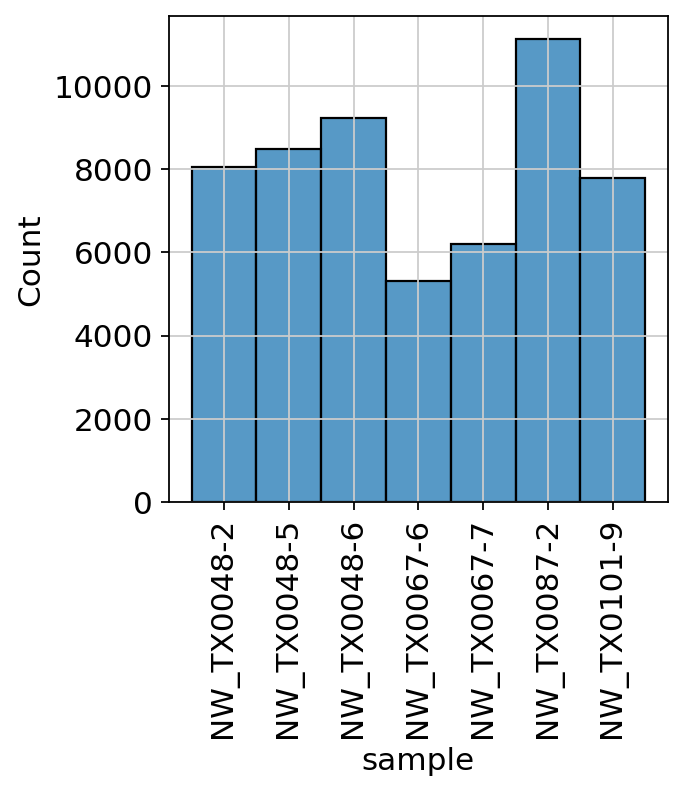

In [ ]:
#print(sub_adata.obs['sample'].value_counts())
#fig, axs = plt.subplots(1,1,figsize=(5,10))
plot = sns.histplot(adata.obs["sample"], kde=False)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(output_fig_dir,"exc_sample_dist.png"),bbox_inches="tight")

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


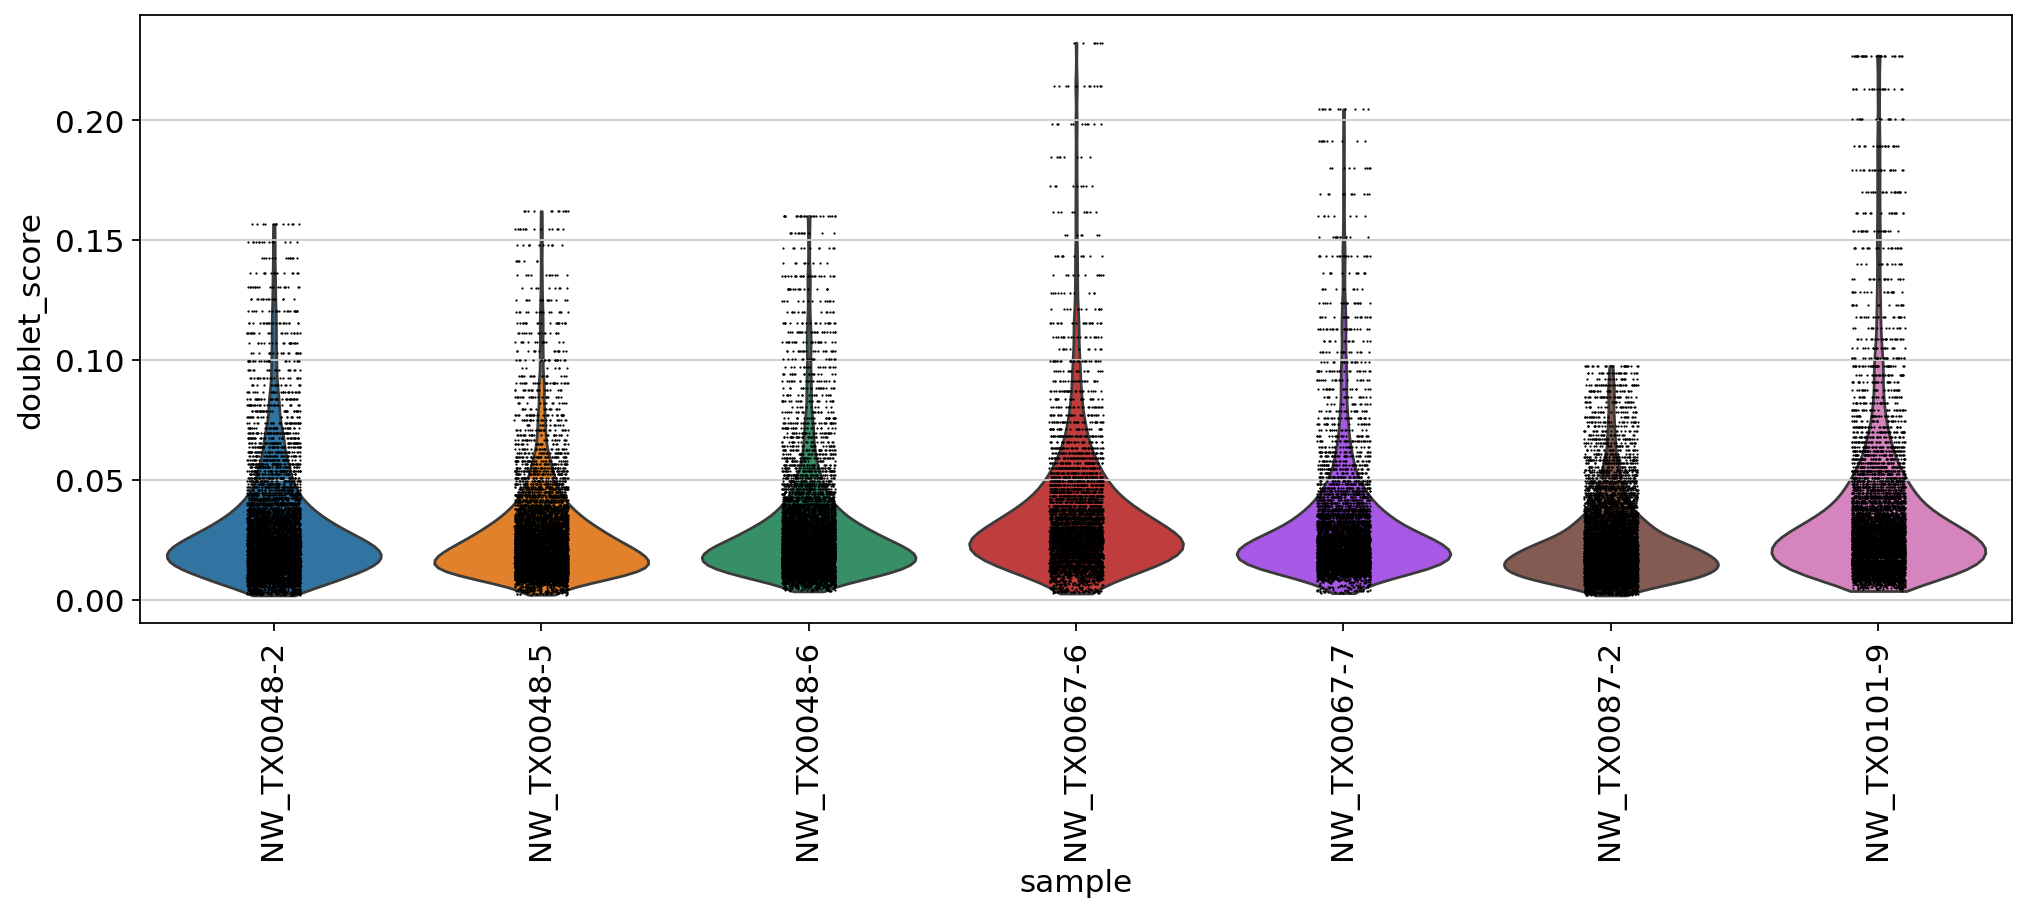

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(15,5))
plot = sc.pl.violin(adata, keys="doublet_score", groupby="sample", ax=axs, show=False)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(output_fig_dir,"exc_doublet_score.png"),bbox_inches="tight")

In [ ]:
# calculate percent ribosomal genes
ribo_genes = adata.var_names.str.startswith(("Rps","Rpl"))
print(sum(ribo_genes))
adata.var['ribo'] = adata.var_names.str.startswith(("Rps","Rpl"))
## the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
#adata.obs['percent_ribo'] = np.sum(


mt
False    19982
True        13
Name: count, dtype: int64


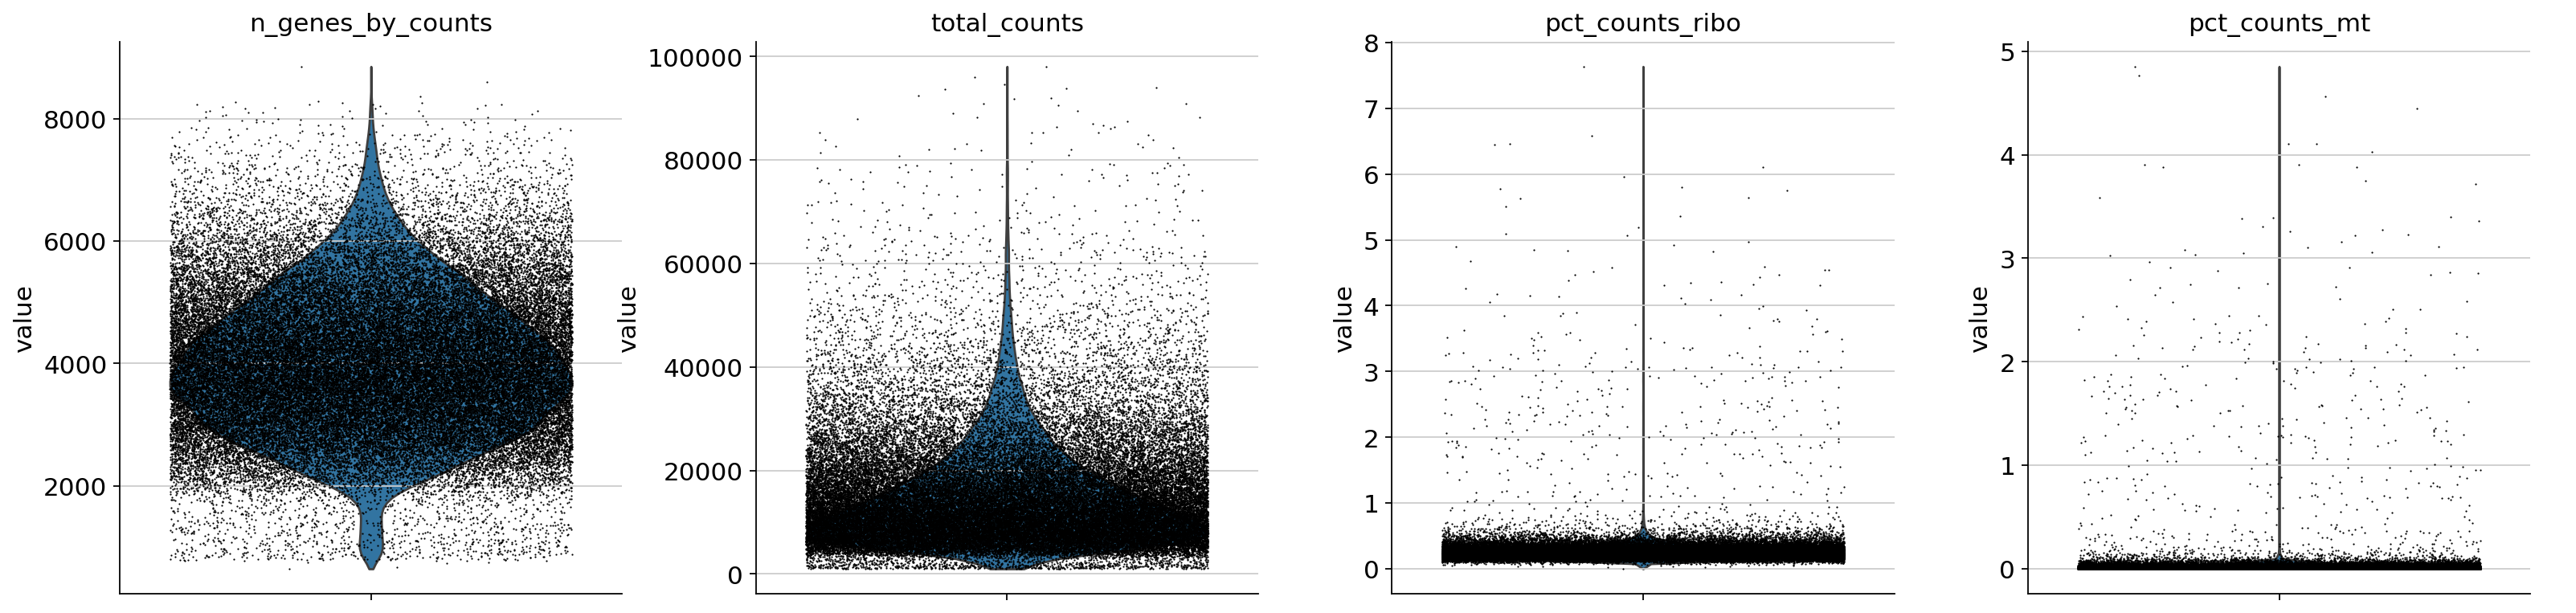

In [ ]:
# annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo'], percent_top=None, log1p=False, inplace=True)
print(adata.var['mt'].value_counts())
adata.obs['pct_counts_mt'] = raw_adata[raw_adata.obs_names.isin(sub_smplist),:].obs['pct_counts_mt']
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_ribo','pct_counts_mt'],jitter=0.4, multi_panel=True, show=False)
plt.savefig(os.path.join(output_fig_dir,"exc_mt_ribo_qc.png"))
#plt.show()

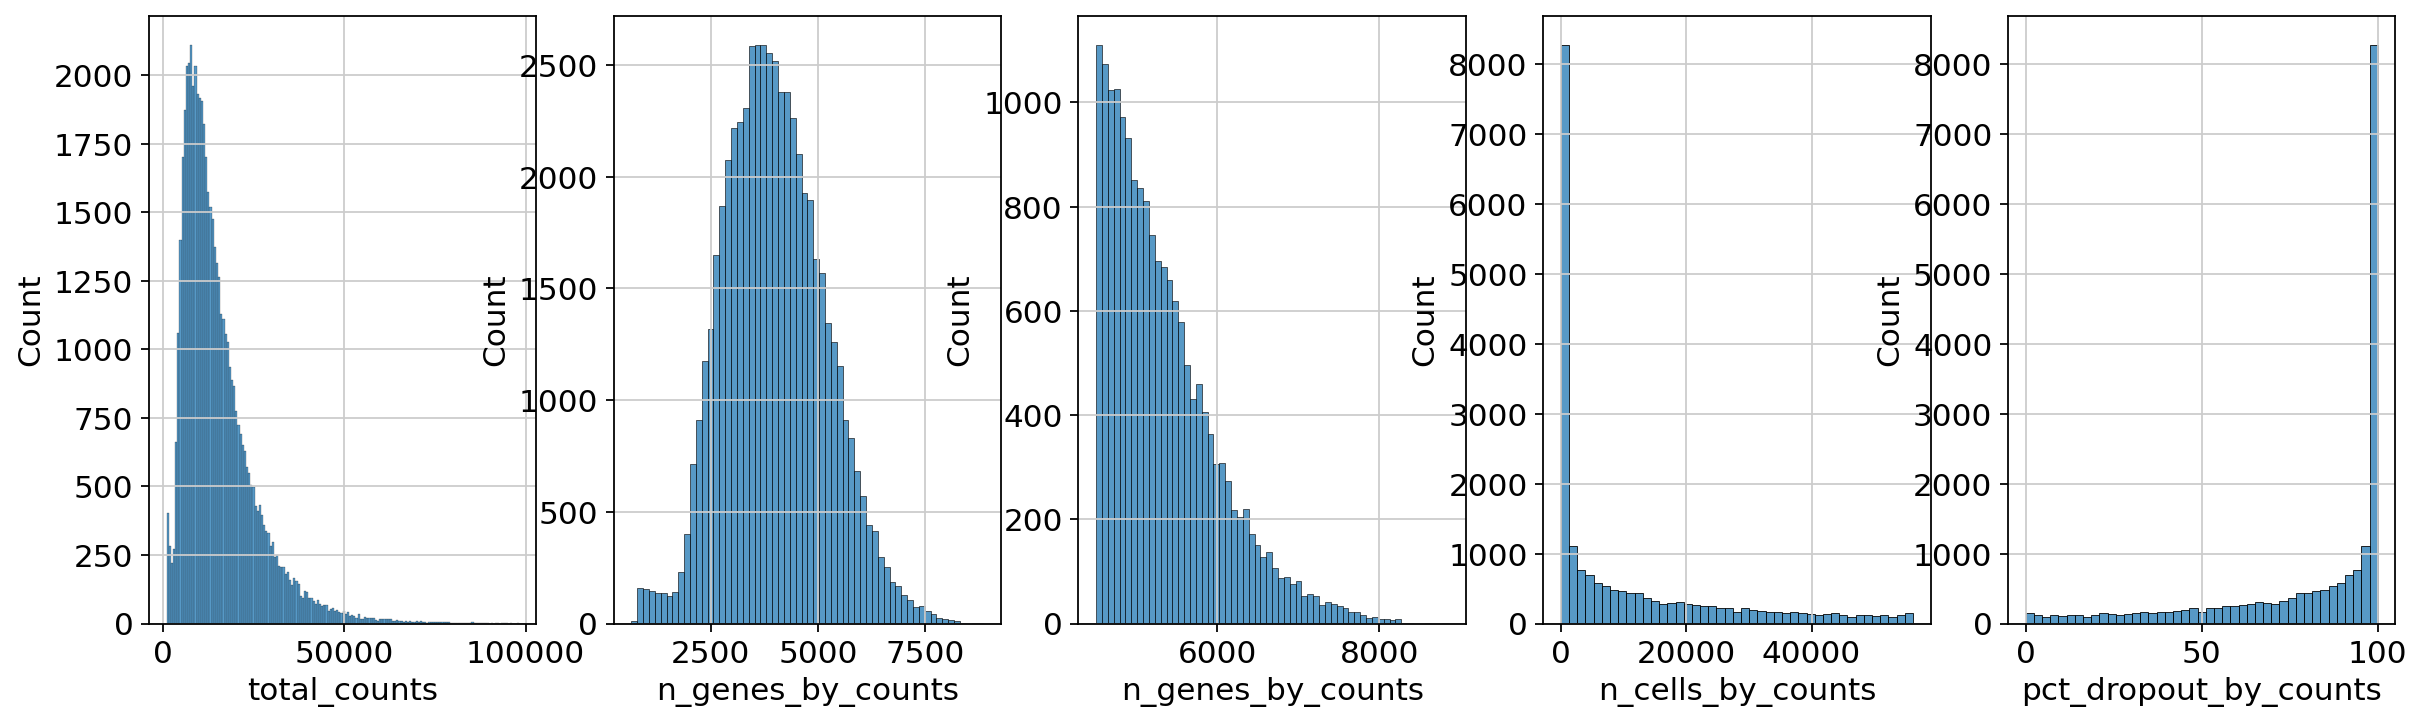

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(18, 5))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[1])
sns.histplot(adata.obs["n_genes_by_counts"][sub_adata.obs["n_genes_by_counts"] > 4500], kde=False, bins=60, ax=axs[2])
sns.histplot(adata.var["n_cells_by_counts"], kde=False, ax=axs[3])
sns.histplot(adata.var["pct_dropout_by_counts"], kde=False, ax=axs[4])
plt.savefig(os.path.join(output_fig_dir,"exc_counts_dist.png"))


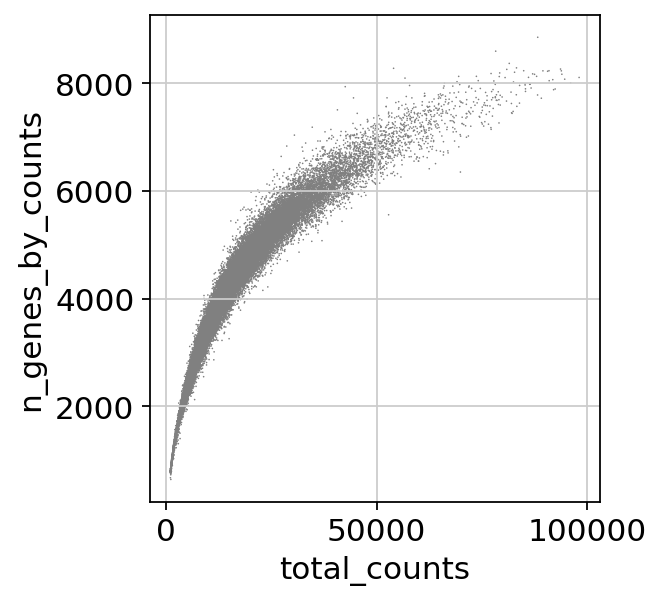

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts',show=False)
plt.savefig(os.path.join(output_fig_dir,"exc_genes_by_counts.png"))
#Can color plot based on any variable from obs

In [ ]:
#sc.pp.filter_cells(adata, max_counts=40000)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes =1000)

#sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
#sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],jitter=0.4, multi_panel=True,save=False)
#plt.savefig(os.path.join(output_fig_dir,"filt_qc.png"))
print(adata)

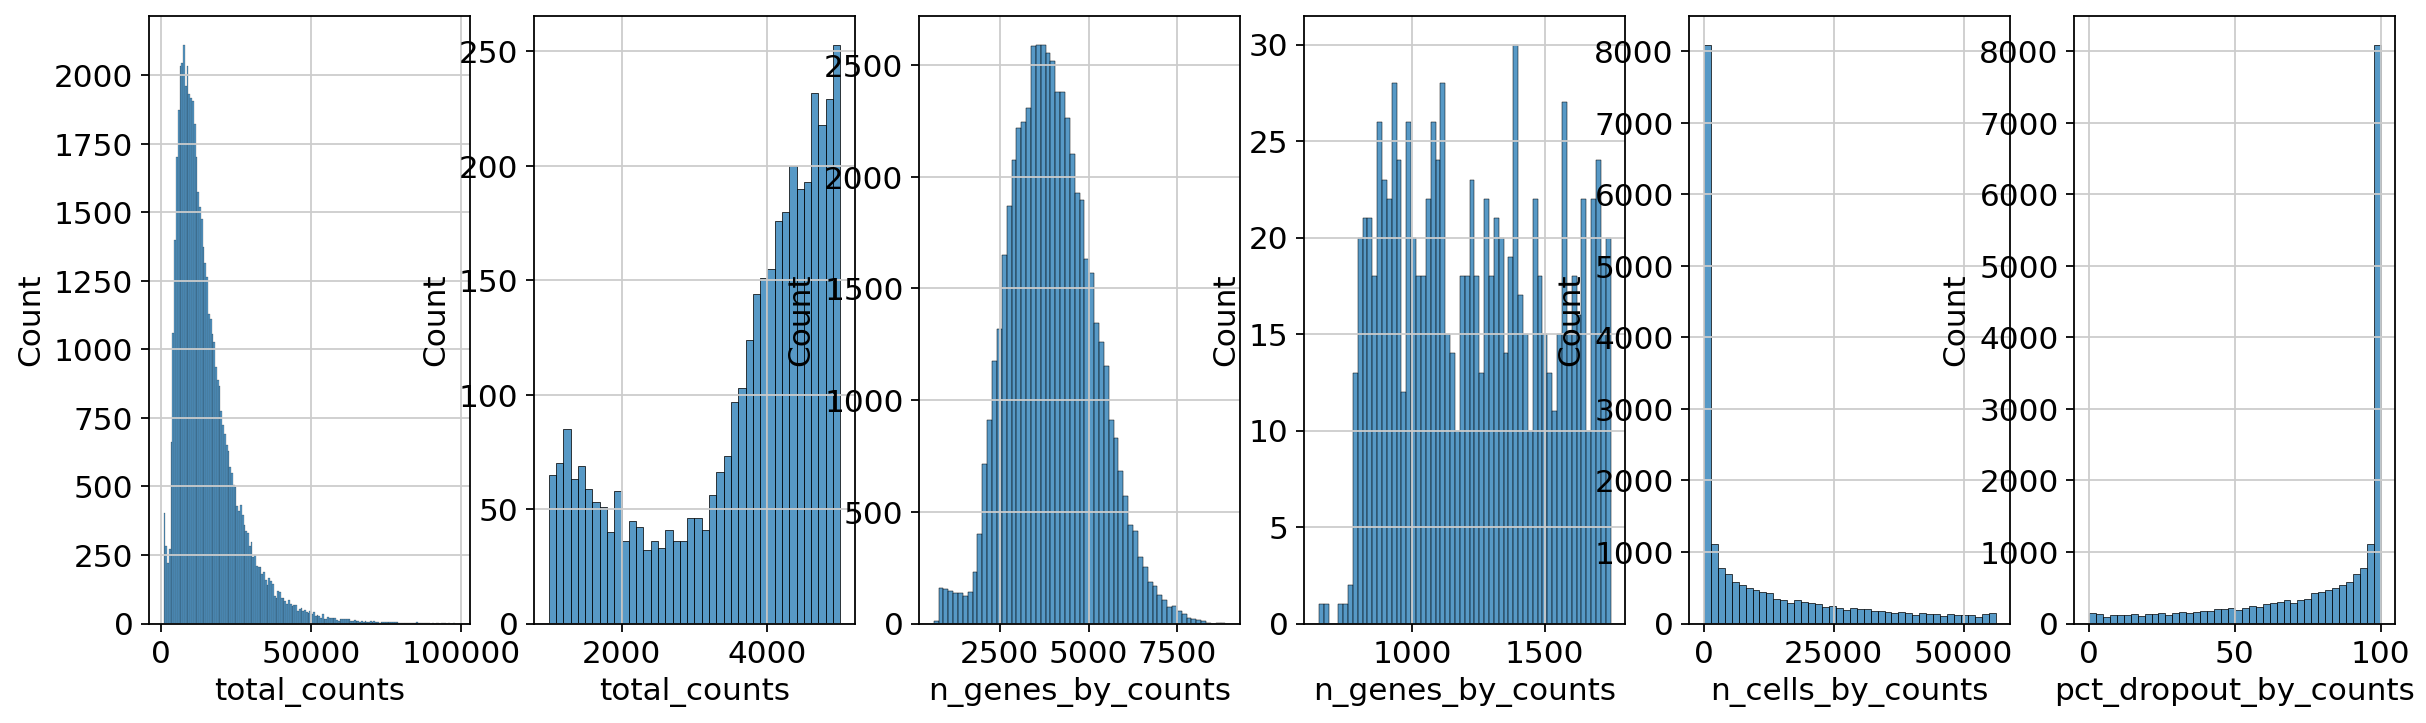

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(18, 5))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(adata.obs["total_counts"][adata.obs["total_counts"] < 5000], kde=False, bins=40, ax=axs[1])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 1750], kde=False, bins=60, ax=axs[3])
sns.histplot(adata.var["n_cells_by_counts"], kde=False, ax=axs[4])
sns.histplot(adata.var["pct_dropout_by_counts"], kde=False, ax=axs[5])
plt.savefig(os.path.join(output_fig_dir,"after_filtering_counts_dist.png"))

In [ ]:
#normalization
#normalize to 10000 reads, log transformed,
sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

extracting highly variable genes
    finished (0:00:09)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
1773


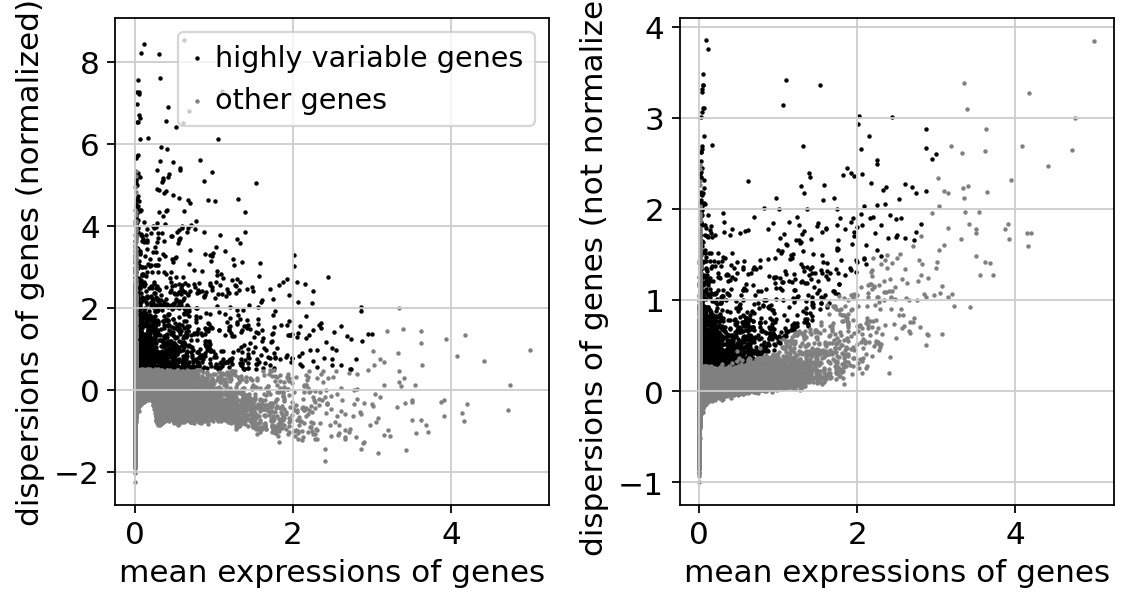

In [ ]:
#Identify highly-variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.012, max_mean=3, min_disp=0.5, flavor="seurat", batch_key='sample')
sc.pl.highly_variable_genes(adata,show=False)
plt.savefig(os.path.join(output_fig_dir,"exc_highly_variable_genes.png"))
print(len(adata.var_names[adata.var.highly_variable]))

In [ ]:
#save normalized adata
adata.raw = adata

In [ ]:
#ribosomal genes in highly variable genes
hvg_gene = adata.var_names[adata.var.highly_variable]
print(hvg_gene[hvg_gene.str.startswith('Rpl')])
print(hvg_gene[hvg_gene.str.startswith('Rps')])

In [ ]:
hvg_df = pd.DataFrame()
hvg_df['gene'] = adata.var_names
hvg_df['hvg'] = adata.var.highly_variable.tolist()
hvg_df.to_csv(os.path.join(output_data_dir,"exc_hvg.txt"),index=False,sep="\t")

In [ ]:
#The result of the previous highly-variable-genes detection is stored as an annotation in .var.highly_variable and auto-detected by PCA and hence, sc.pp.neighbors and subsequent manifold/graph tools. In that case, the step actually do the filtering below is unnecessary, too.

#Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed, and ribosomal gene expressed. Scale the data to unit variance.
adata = adata[:, adata.var.highly_variable]


In [ ]:

sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt','pct_counts_ribo'])
#Scale each gene to unit variance. Clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)

In [ ]:
#remove mt genes, and sex genes before clustering

gene_screenfile="/content/drive/MyDrive/LeoDai/Private_Data/Preprocessing/rat/Rat_chrXYMT_gene.txt"
rm_genelist = pd.read_csv(gene_screenfile,sep="\t",header=0)
#rm_genelist.columns = ["gene"]
print(rm_genelist)
filt_gene = adata.var_names[~adata.var.gene_ids.isin(rm_genelist['gene'])]
adata = adata[:,filt_gene]

In [ ]:
adata.write_h5ad(os.path.join(output_data_dir,"exc_norm_hvg.h5ad"),compression='gzip')

In [ ]:
ribo_genes = adata.var_names[adata.var.ribo]
print(ribo_genes)

In [ ]:
#remove ribo genes
adata = adata[:, ~adata.var_names.isin(ribo_genes)]

computing PCA
    on highly variable genes
    with n_comps=50


/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


    finished (0:00:05)


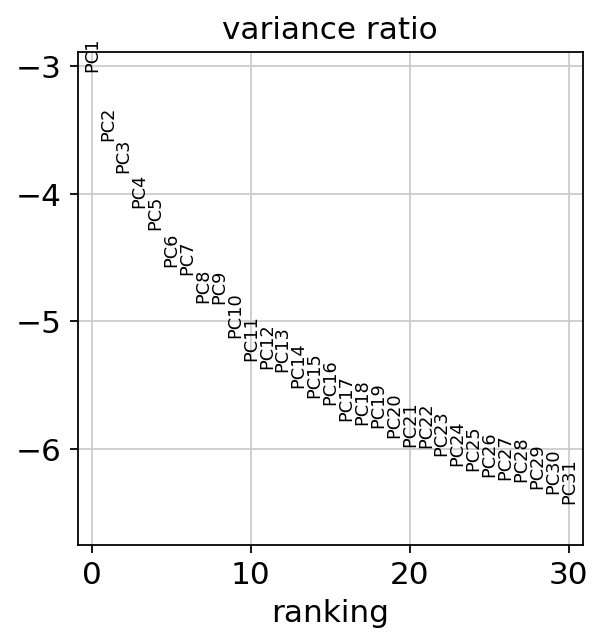

In [ ]:
#Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.

sc.tl.pca(adata, svd_solver='arpack')

sc.pl.pca_variance_ratio(adata, log=True,show=False)
plt.savefig(os.path.join(output_fig_dir,"exc_pca_var_ratio.png"))

In [ ]:
#batch correction
sc.external.pp.harmony_integrate(adata, 'sample')
#replcae PCA by the batch corrected data
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)


In [ ]:
fig, axs = plt.subplots(1,1,figsize=(15,5))
plot = sc.pl.violin(adata, keys="pct_counts_mt", groupby="leiden", ax=axs, show=False)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(output_fig_dir,"exc_hvg_pct_counts_mt_resol2_bycluster.png"),bbox_inches="tight")

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(15,5))
plot = sc.pl.violin(adata, keys="pct_counts_ribo", groupby="leiden", ax=axs, show=False)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.savefig(os.path.join(output_fig_dir,"exc_hvg_pct_counts_ribo_resol22_cluster.png"),bbox_inches="tight")

In [ ]:
sc.tl.leiden(adata, resolution=2.2)
#calculate paga & plot
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False,show =False,use_raw=True)  # remove `plot=False` if you want to see the coarse-grained graph
#plt.savefig(os.path.join(output_dir,"paga_leiden_cluster.png"))
sc.tl.umap(adata, init_pos='paga')
sc.pl.umap(adata, color=["sample","leiden"], cmap="tab20",show=False,wspace=0.5)
plt.savefig(os.path.join(output_fig_dir,"exc_Harmony_umap_by_sample_resol22.png"))
with plt.rc_context({"figure.figsize": (3, 3), "figure.dpi": 200, "figure.frameon": False, "font.size": (6), "font.weight": ("normal"), "text.color": ("gold")}):
    sc.pl.umap(adata, color=["leiden"], cmap="tab20",show=False,wspace=0.5,legend_loc = "on data")
    plt.savefig(os.path.join(output_fig_dir,"exc_Harmony_umap_leidenid_resol22.png"))

In [ ]:
#Get the most variable genes that define each cluster
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False,show=False)
plt.savefig(os.path.join(output_fig_dir,"exc_level3_rank_genes_groups.png"))


In [ ]:
#human markers
#L2_3_IT = ["CUX2","TAFA1"] #Intratelencephalic projecting
#L5_ET = ["FEZF2"] #LOC105376457, OR51E2 marker of extratelencephalic
#L5_IT = ["RORB","POU6F2"] # LOC105374971 and CUX2 and TAFA1 and no HS3ST2
#L5_6NP = ["PHLDB2"] # NPSR1_AS1 near projecting
#L6_CT = ["SEMA5A"] #EGFEM1P
#L6_IT_Car3 =["ATP10A","RGS12"] # RGS12 KLHL1
#L6_IT =["THEMIS","PDE7B","RGS20"] #LINC00343, LOC101928278 RGS20
#L6b = ["MDFIC","NPFFR2"]
#L5 marker RORB

#mouse markers
L2_3_IT = [ "Rasgrf2","Cux1"] #Tafa1 not found
L5_6NP = ["Etv1","Tshz2","Nxph1"]
L5_ET = ["Vat1l","Lpp","Slc26a4"] #Gm2164 not found
L5_IT = ["Cdh12","Pdzrn3","St6galnac5"] # doesn't help, very little expression, Cdh12 doesn't help expressed every where
L6b = ["Cplx3","Ccn2"]
L5_IT = ["Pdzrn3","St6galnac5","Cacna2d3","Cdh10","Igsf9b","Unc5d","Fstl4","Pcdh15","Epha4","Slc24a3"] # doesn't help, very little expression, Cdh12 doesn't help expressed every where

L5_IT = []

L6_CT = ["Sema5a","Foxp2"] #,"Hs3st4"]
L5_6IT = ["Ush2a","Rxfp1"]
#
L6_IT = ["Il1rapl2","Sulf1","Adamts3","Cdh9","Cck"]
L6_CT_Cpa6 = []
L23_5IT = ["Cux2","Adamtsl2"]

marker_genes = L2_3_IT + L5_ET + L5_IT + L5_6NP + L6_CT + L6_IT + L6b + L6_CT_Cpa6  + L5_6IT + L23_5IT

marker_genes.append("Syt6")




In [ ]:
L6b = ["26","35","34"] # Ccn2, Cplx3
L6_CT = ["2","9","12","14","22","33","41"]#Sema5a, Nxph1 and no Tshz2
L5_6NP = ["25","28","36"] #Etv1, Tshz2
L2_3_IT = ["0","6","1","29","10","17","20","3","4","5"] #Calb1, Rasgrf2
L5_ET = ["16","21","40"] #Vat1l, Lpp, Slc26a4
L56_ET_new = ["38"]
L6_IT = ["18","19","27","13"] #"Adamts3","Cdh9","Cck","Cdh13"

novel_1 = ["37","39"]
novel_2 = ["31"]

L5_LT = ["7","11","15","24"]
L6_CT_Cpa6 = ["23"]
L5_6IT = ["8","32"]
L23_5IT = ["30"]

In [ ]:
flist = L6b + L6_CT + L2_3_IT + L5_6NP + L5_ET + L56_ET_new + L6_IT + L5_LT + L6_CT_Cpa6 + novel_1 + novel_2 + L23_5IT + L5_6IT
print(flist)
print(len(flist))
print(np.sort(flist))

In [ ]:
#print(adata)
cls =36
mg1 = []
for i in range(50):
    mg1.append(adata.uns['rank_genes_groups']['names'][i][cls])

print(mg1)
cls = 23
mg2 = []
for i in range(50):
    mg2.append(adata.uns['rank_genes_groups']['names'][i][cls])
print(mg2)
#cls = 5
#mg3 = []
#for i in range(30):
#    mg3.append(adata.uns['rank_genes_groups']['names'][i][cls])

print(mg2)
mg12 = set(mg1).intersection(mg2)
print(mg12)
#mg123 = set(mg12).intersection(mg3)
#print(set(mg12).intersection(mg3))
#print(mg1)
marker_genes = marker_genes + list(mg2)
#marker_g1 = [g for g in adata.uns['rank_genes_groups']['names'][1]]
#marker_g2 = [g for g in adata.uns['rank_genes_groups']['names'][2]]

In [ ]:
sc.pl.dotplot(adata, var_names=marker_genes, groupby="leiden", dendrogram=True, swap_axes=True,show=False)
plt.savefig(os.path.join(output_fig_dir,"exc_level2_gene_markers_dotplot.png"))

In [ ]:

L2_3_IT = ["0","6","1","29","10","17","20","3","4","5"] #Calb1, Rasgrf2
L5_ET = ["16","21","40"] #Vat1l, Lpp, Slc26a4

L6_IT = ["18","19","27","13"] #"Adamts3","Cdh9","Cck","Cdh13"

Novel_1 = ["37","39"]
Novel_2 = ["31"]

L5_IT = ["7","11","15","24"]
L6_CT_Cpa6 = ["23"]
L5_6IT = ["8","32"]
L23_5IT = ["30"]
L6b = ["26","35","34"] # Ccn2, Cplx3
L6_CT = ["2","9","12","14","22","33","41"]#Sema5a, Nxph1 and no Tshz2
L5_6NP = ["25","28","36"] #Etv1, Tshz2
Novel_3 = ["38"]

flist = L6b + L6_CT + L2_3_IT + L5_6NP + L5_ET + L56_ET_new + L6_IT + L5_IT + L6_CT_Cpa6 + Novel_1 + Novel_2 + L23_5IT + L5_6IT + Novel_3
print(flist)
print(len(flist))
print(np.sort(flist))

In [ ]:
adata.obs['cluster_label'] = np.empty([adata.n_obs], dtype=str)
adata.obs['subclass'] = np.empty([adata.n_obs], dtype=str)
#adata.obs['subclass'] = np.empty([adata.n_obs], dtype=str)
for idx,i in enumerate(L2_3_IT):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'L2_L3_IT_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'L2_L3_IT'

for idx,i in enumerate(L5_ET):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'L5_ET_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'L5_ET'

for idx,i in enumerate(L5_IT):
  #print(i)
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'L5_IT_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'L5_IT'

for idx,i in enumerate(L5_6NP):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'L5_6NP_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'L5_6NP'

for idx,i in enumerate(L6_CT):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'L6_CT_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'L6_CT'

for idx,i in enumerate(L6_CT_Cpa6):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'L6_CT_Cpa6_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'L6_IT_Cpa6'

for idx,i in enumerate(L6_IT):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'L6_IT_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'L6_IT'

for idx,i in enumerate(L6b):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'L6b_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'L6b'

for idx,i in enumerate(L5_6IT):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'L5_6IT_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'L5_6IT'

for idx,i in enumerate(L23_5IT):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'L23_5IT_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'L23_5IT'

for idx,i in enumerate(Novel_1):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'Novel_1_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'Novel_1'

for idx,i in enumerate(Novel_2):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'Novel_2_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'Novel_2'

for idx,i in enumerate(Novel_3):
  adata.obs.loc[adata.obs.leiden == i, 'cluster_label'] = 'Novel_3_'+str(idx)
  adata.obs.loc[adata.obs.leiden == i, 'subclass'] = 'Novel_3'

print(len(adata.obs.cluster_label.unique()))
print(adata.obs.leiden.unique())

In [ ]:
adata.write_h5ad(os.path.join(output_data_dir,"Rat_exc_level2_level3_cluster_v2.h5ad"),compression='gzip')

print(adata)

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


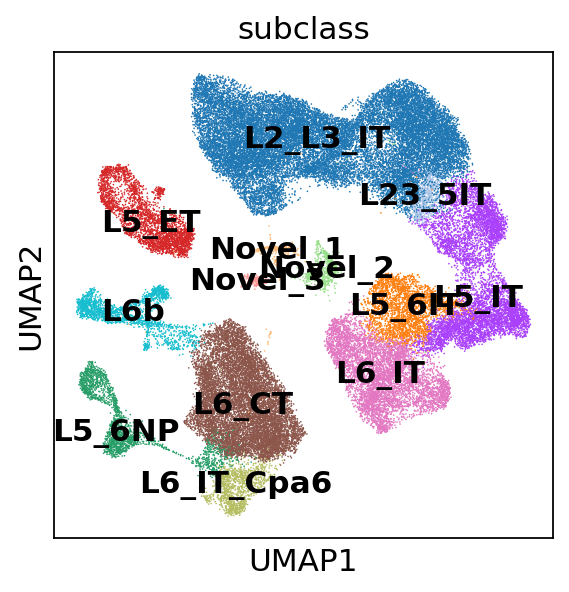

In [ ]:
sc.pl.umap(adata, color=["subclass"], cmap="tab20",show=False,legend_loc="on data")
plt.savefig(os.path.join(output_fig_dir,"exc_subclass.png"))

In [ ]:
#!pip install adjustText
from adjustText import adjust_text

def gen_mpl_labels(
    adata, groupby, exclude=(), ax=None, adjust_kwargs=None, text_kwargs=None
):
    if adjust_kwargs is None:
        adjust_kwargs = {"text_from_points": False}
    if text_kwargs is None:
        text_kwargs = {}

    medians = {}

    for g, g_idx in adata.obs.groupby(groupby).groups.items():
        if g in exclude:
            continue
        medians[g] = np.median(adata[g_idx].obsm["X_umap"], axis=0)

    if ax is None:
        texts = [
            plt.text(x=x, y=y, s=k, **text_kwargs) for k, (x, y) in medians.items()
        ]
    else:
        texts = [ax.text(x=x, y=y, s=k, **text_kwargs) for k, (x, y) in medians.items()]

    adjust_text(texts, **adjust_kwargs)

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


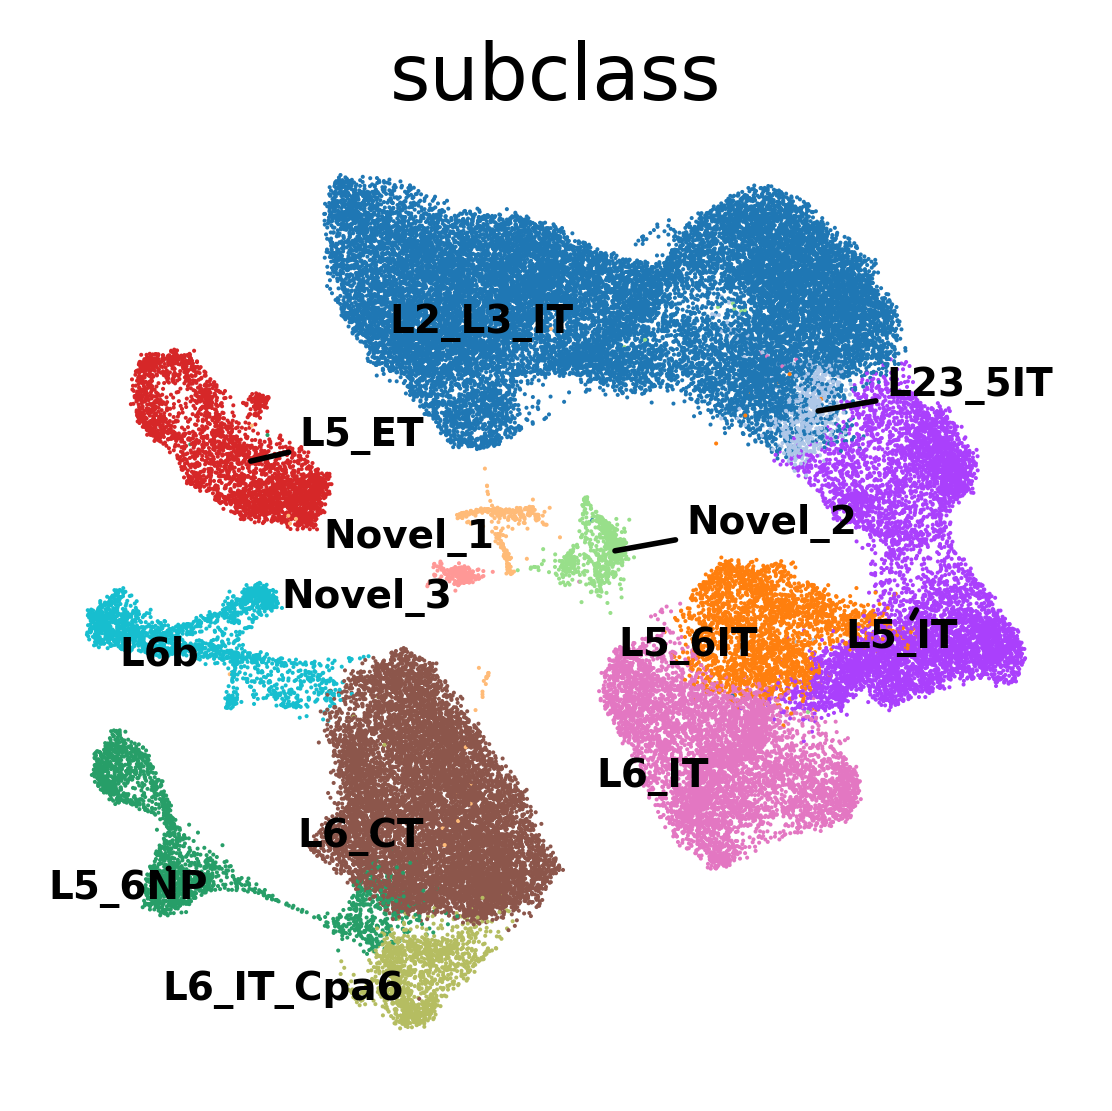

In [ ]:
with plt.rc_context({"figure.figsize": (3, 3), "figure.dpi": 200, "figure.frameon": False}):
    ax = sc.pl.umap(adata, color="subclass", show=False, legend_loc=None, frameon=False)
    gen_mpl_labels(
        adata,
        "subclass",
        exclude=("None",),  # This was before we had the `nan` behaviour
        ax=ax,
        adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
        text_kwargs=dict(fontsize=7,fontweight='bold'),
    )
    fig = ax.get_figure()
    fig.tight_layout()
    #plt.show()
    fig.savefig(os.path.join(output_fig_dir,"exc_subclass_umap_v2.png"))

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


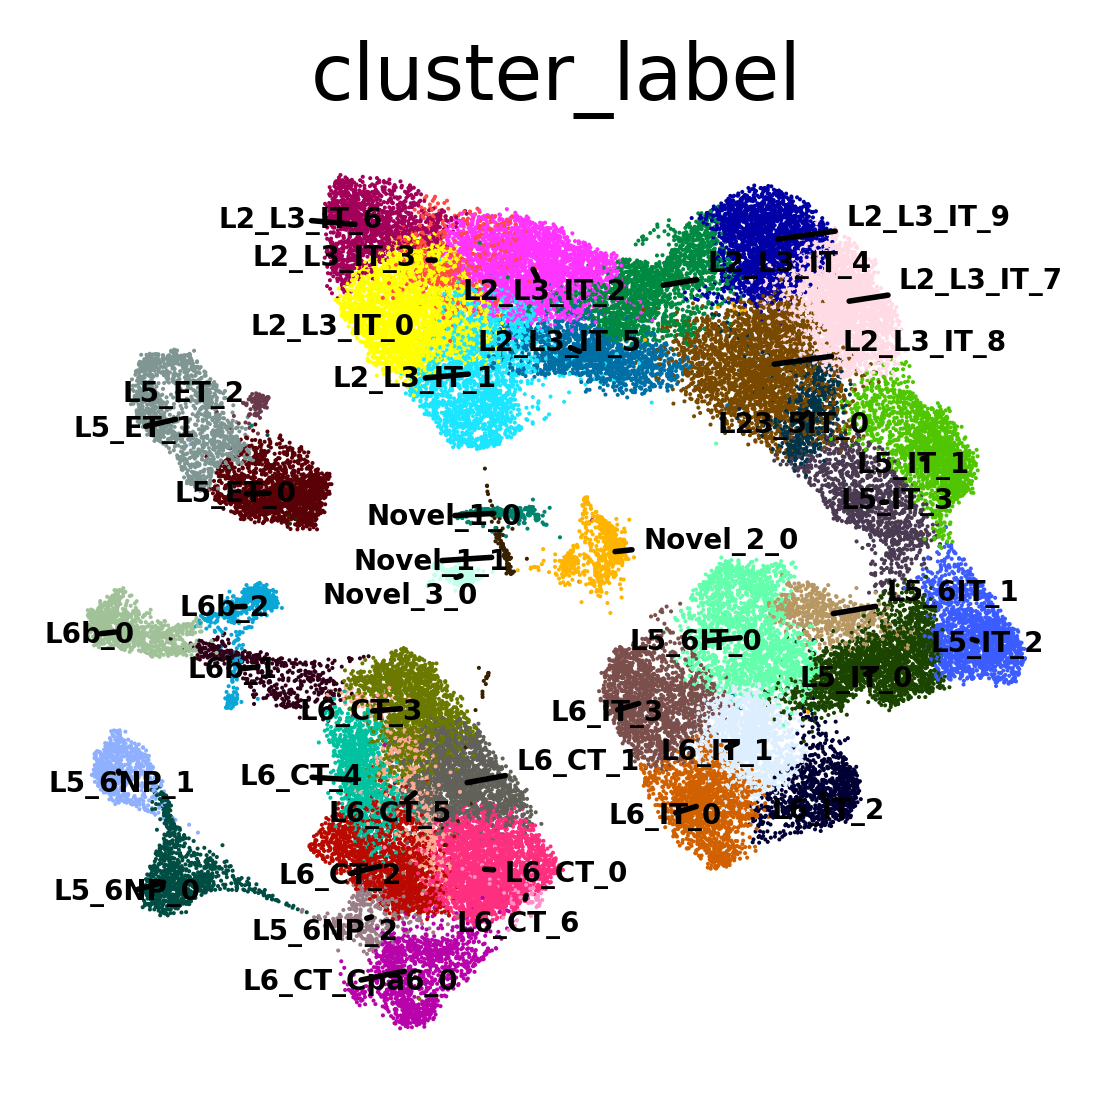

In [ ]:
with plt.rc_context({"figure.figsize": (3, 3), "figure.dpi": 200, "figure.frameon": False}):
    ax = sc.pl.umap(adata, color="cluster_label", show=False, legend_loc=None, frameon=False)
    gen_mpl_labels(
        adata,
        "cluster_label",
        exclude=("None",),  # This was before we had the `nan` behaviour
        ax=ax,
        adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
        text_kwargs=dict(fontsize=5,fontweight='bold'),
    )
    fig = ax.get_figure()
    fig.tight_layout()
    #plt.show()
    fig.savefig(os.path.join(output_fig_dir,"exc_level3_cluster_umap_v2.png"))

In [ ]:
print(adata.obs.cluster_label.value_counts())
df = adata.obs.cluster_label.value_counts().to_frame().reset_index()
df.columns = ['cluster_label','count']
df.to_csv(os.path.join(output_data_dir,"Rat_exc_level2_level3_cluster.csv"),index=False)

In [ ]:
adata.write(adata, os.path.join(output_data_dir,"Rat_exc_level2_level3_cluster.h5ad"))

/content/drive/MyDrive/virtual_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


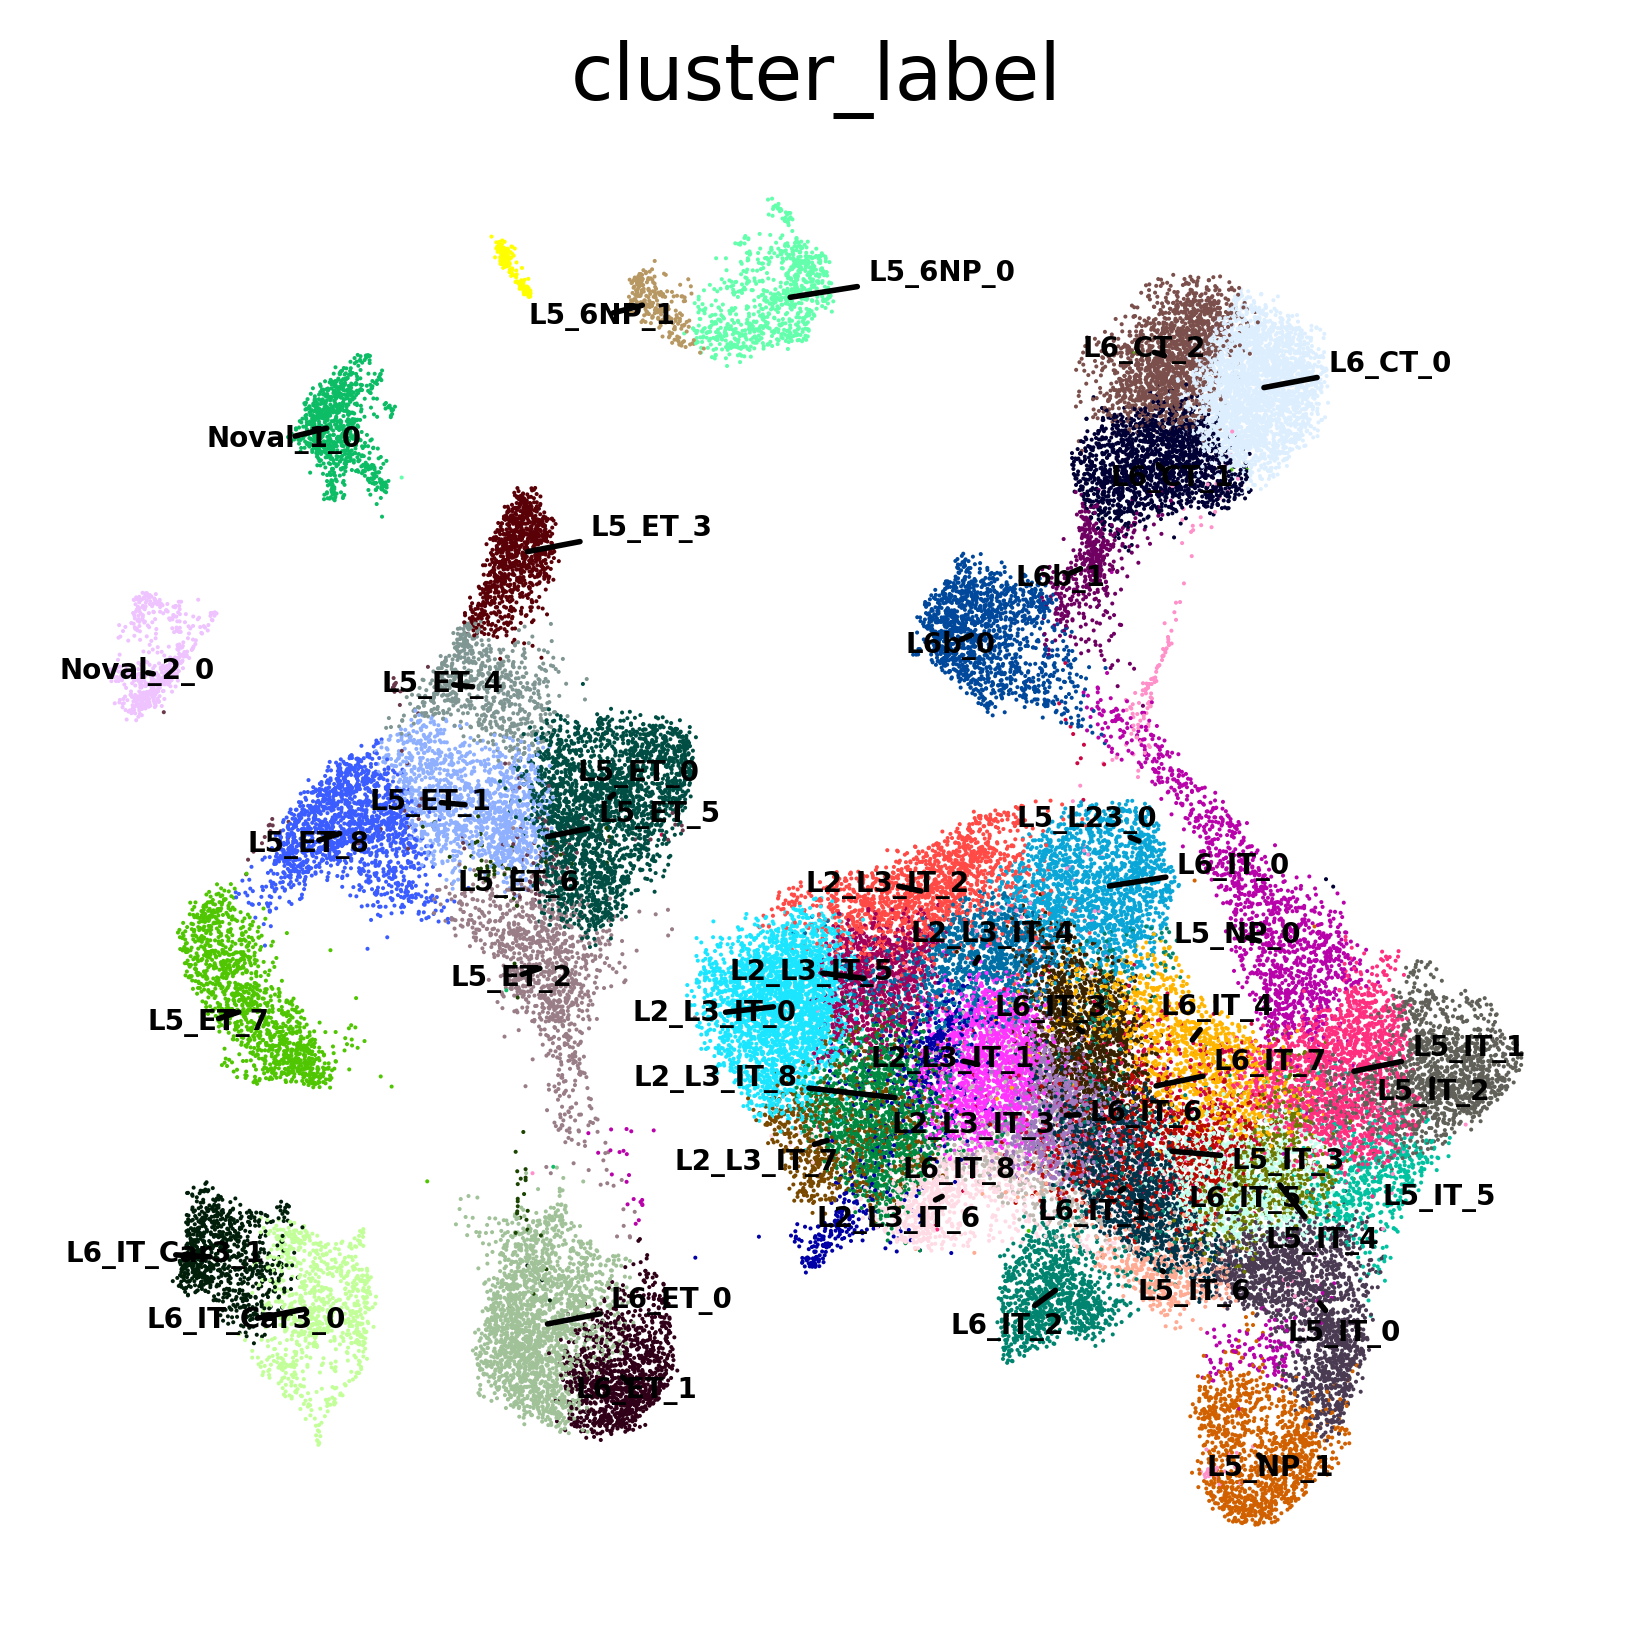

In [ ]:
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": 200, "figure.frameon": False, "font.size": (4), "font.weight": ("normal")}):
    ax = sc.pl.umap(test, color="cluster_label", show=False, legend_loc=None, frameon=False)
    gen_mpl_labels(
        test,
        "cluster_label",
        exclude=("None",),  # This was before we had the `nan` behaviour
        ax=ax,
        adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
        text_kwargs=dict(fontsize=5,fontweight='bold'),
    )
    fig = ax.get_figure()
    fig.tight_layout()
    #plt.show()
    fig.savefig(os.path.join(output_fig_dir,"../../Chimp/exc_level3_cluster_umap.png"))